In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy

In [77]:
scipy.__version__

'1.1.0'

# `minimize_scalar()`

This method is used to minimize a scalar function of a single variable. Documentation is available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html#scipy.optimize.minimize_scalar

## Calling signature

`res = scipy.optimize.minimize_scalar(fun, bracket=None, bounds=None, args=(), method='brent', tol=None, options=None)`

*fun* is the scalar function on 1 variable to be minimized.

*bracket* and *bounds* set up the search regions for the `brent` (the default) and `golden` methods.

*args* is a tuple of additional arguments to the function.

*method* (it is CASE-INSENSITIVE) defines the minimization method to use. Options are `Brent`, `Bounded`, `Golden`, or a custom callable object. The `Brent` method uses inverse parabolic interpolation to speed up the golden section search. The `Bounded` method uses the `Brent` method to find a bounded minimum ($x_1 < x_{opt} < x_2$). The `Golden` method uses the golden section search algorithm. If a custom method is used, it is called as `method(fun, args, **kwargs, **options)`. `kwargs` contains the other options for `minimize`, while `options` are method-specific options.

*tol* is the tolerance for termination.

*options* is a dictionary of options. `maxiter` is an integer maximum iteration count. `disp` is a Boolean for printing convergence messages.

*res* is an `OptimizeResult` object. The important attributes are: `x` - the solution array, `success` - a Boolean indicating a solution was found, and `message` - a string indicating the cause of the termination.

## Examples

In [39]:
def f(x):
    return (x - 2) * x * (x + 2)**2

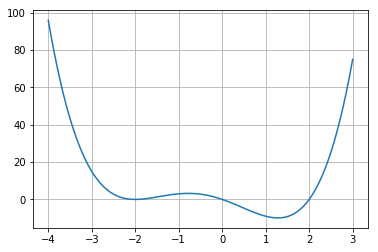

In [40]:
x = np.linspace(-4, 3, 100)
y = np.vectorize(f)(x)
plt.plot(x, y)
plt.grid()

In [5]:
from scipy.optimize import minimize_scalar

Try the method with all defaults.

In [24]:
res = minimize_scalar(f)
res.x

1.2807764040333458

Try each method.

In [52]:
res = minimize_scalar(f, method='brent')
res.x

1.2807764040333458

In [54]:
res = minimize_scalar(f, method='bounded', bounds=(-4,4))
res.x

1.280777325016399

In [55]:
res = minimize_scalar(f, method='golden')
res.x

1.280776401465682

Now try using the `Bounded` search method in the range `(-3,-1)`.

In [56]:
res = minimize_scalar(f, method='bounded', bounds=(-3,-1))
res.x

-2.000000202597239

Try the `Bounded` method again, in a range which has both minima.

In [27]:
res = minimize_scalar(f, bounds=(-4,4), method='Bounded')
res.x

1.280777325016399

Try again, but use a larger left-hand region, presumably to favor the left-hand minimum.

In [29]:
res = minimize_scalar(f, bounds=(-100,4), method='Bounded')
res.x

1.2807778160292125

Nope, it still gets the right-hand minimum, which is actually the global minimum. Try one more time, with a very large range.

In [30]:
res = minimize_scalar(f, bounds=(-1000,1000), method='Bounded')
res.x

1.280776343057692

Again, it gets the global minimum.

Try the golden section search.

In [31]:
res = minimize_scalar(f, bounds=(-4,4), method='Golden')
res.x

1.280776401465682

In [33]:
res = minimize_scalar(f, bounds=(-4,0), method='Golden')
res.x

1.280776401465682

Odd - that is outside the specified range.

In [34]:
res = minimize_scalar(f, bounds=(-4,-1), method='Golden')
res.x

1.280776401465682

So is that. Don't use a bracket?

In [35]:
res = minimize_scalar(f, method='Golden')
res.x

1.280776401465682

Ahh. The `bounds` argument is only used for the `Bounded` method. A *bracket* is needed to restrict the search region.

In [37]:
res = minimize_scalar(f, bracket=(-4,-1), method='Golden')
res.x

1.2807764050444765

That still does not work. Ah - the starting bracket does not always contain the solution found, according to the documentation.

Now try convergence messages.

In [48]:
res = minimize_scalar(f, options={'disp':True})
res.x

/Users/ewinter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: OptimizeWarning: Unknown solver options: disp
  """Entry point for launching an IPython kernel.


1.2807764040333458

Odd - that is how the dictionary is supposed to look.

In [47]:
res = minimize_scalar(f, disp=True)
res.x

TypeError: minimize_scalar() got an unexpected keyword argument 'disp'

Try setting `disp` for a different method.

In [57]:
res = minimize_scalar(f, method='golden', options={'disp':True})
res.x

/Users/ewinter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: OptimizeWarning: Unknown solver options: disp
  """Entry point for launching an IPython kernel.


1.280776401465682

In [58]:
res = minimize_scalar(f, method='brent', options={'disp':True})
res.x

/Users/ewinter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: OptimizeWarning: Unknown solver options: disp
  """Entry point for launching an IPython kernel.


1.2807764040333458

In [59]:
res = minimize_scalar(f, method='bounded', bounds=(-4,4), options={'disp':True})
res.x


Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  1e-05 )


1.280777325016399

So the `disp` option only works for the `bounded` search method? That's ... odd.

So the default tolerance is `1e-5`. Try setting the tolerance.

In [51]:
res = minimize_scalar(f, tol=1e-10)
res.x

1.2807764059814637

Now try a more complicated function, that takes other parameters.

In [60]:
def g(x, a, b):
    return (x - a) * x * (x + b)**2

In [62]:
res = minimize_scalar(g, args=(2,2), method='bounded', bounds=(-4,4), options={'disp':True})
res.x


Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  1e-05 )


1.280777325016399

In [66]:
def h(x, a):
    return (x - a[0]) * x * (x + a[1])**2

In [67]:
res = minimize_scalar(h, args=([2,2]), method='bounded', bounds=(-4,4), options={'disp':True})
res.x


Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  1e-05 )


1.280777325016399

So that works, with both scalar and array function arguments. Try a dictionary.

In [68]:
def h2(x, args):
    return (x - args['a']) * x * (x + args['b'])**2

In [69]:
res = minimize_scalar(h2, args=({'a':2, 'b':2}), method='bounded', bounds=(-4,4), options={'disp':True})
res.x


Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  1e-05 )


1.280777325016399

So that works too.

Try setting the maximum number of iterations.

In [63]:
res = minimize_scalar(f, method='bounded', bounds=(-4,4), options={'disp':True, 'maxiter':1})
res.x


Maximum number of function evaluations exceeded --- increase maxfun argument.



0.9442719099991583

In [64]:
res = minimize_scalar(f, method='bounded', bounds=(-4,4), options={'disp':True, 'maxiter':10})
res.x


Maximum number of function evaluations exceeded --- increase maxfun argument.



1.2807739726861176

In [65]:
res = minimize_scalar(f, method='bounded', bounds=(-4,4), options={'disp':True, 'maxiter':100})
res.x


Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  1e-05 )


1.280777325016399

Now look at the contents of the `OptimizeResult` return value.

In [70]:
dir(res)

['fun', 'message', 'nfev', 'status', 'success', 'x']

`fun` is the function value at the computed minimum.

In [71]:
res.fun

-9.914949590816732

`message` specifies the reason for termination.

In [72]:
res.message

'Solution found.'

`nfev` is the number of function evaluations performed.

In [73]:
res.nfev

12

`status` is an integer code which varies with the solver.

In [74]:
res.status

0

`success` says if the minimum was found or not.

In [75]:
res.success

True

`x` is the solution point.

In [76]:
res.x

1.280777325016399